# $\color{orange}{\text{2.MNIST Classification Using Pytorch}}$


# Loading Dataset

In [ ]:
import torch
import torchvision
from torchvision import datasets
from sklearn.model_selection import train_test_split
from  matplotlib import pyplot as plt
import torchvision.transforms as transforms

transform =transforms.ToTensor()
traindata = datasets.MNIST('data', train=True, download=True, transform=transform)
testdata = datasets.MNIST('data', train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(traindata, batch_size=64, shuffle= True)
test_loader = torch.utils.data.DataLoader(testdata, batch_size=64, shuffle= True)

# Visualization

In [ ]:
from PIL import Image
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


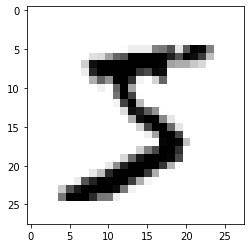

In [ ]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

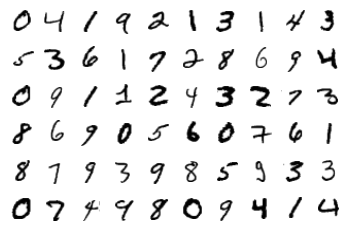

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

#MNIST Model 

In [ ]:
import numpy as np
from torch import nn
# Layer details for the neural network
input_size = 784
hidden_sizes = [500,250,100]
output_size = 10

# Build a feed-forward network
model1 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], output_size))
                      
print(model1)

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=250, bias=True)
  (3): ReLU()
  (4): Linear(in_features=250, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=10, bias=True)
)


# Without Regularization

In [ ]:
train_loader = torch.utils.data.DataLoader(traindata, batch_size=64, shuffle= True)
test_loader = torch.utils.data.DataLoader(testdata, batch_size=64, shuffle= True)

In [ ]:
from tqdm.notebook import tqdm_notebook

loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model1.parameters(), lr=0.01)  # No regularization

epochs = 15
train_losses = []
test_losses = []
train_epoch_loss = []
for e in range(epochs):
  running_loss = 0
  for i,(images, label) in tqdm_notebook(enumerate(train_loader)):
    images = images.view(images.shape[0],784)
    #images, label = data[0],data[1]
    model1.train()

    # Training pass
    optimizer.zero_grad()
    output = model1(images)
    loss = loss_fn(output, label)

    #This is where the model learns by backpropagating
    loss.backward()

    #And optimizes its weights here 
    optimizer.step()
    running_loss += loss.item()
    if i % 200 == 0:
      with torch.no_grad():
        running_loss = 0 
        model1.eval()

        train_loss = 0
        for x_train, y_train in train_loader:
          x_train = x_train.view(x_train.shape[0],784)
          output = model1(x_train)
          loss = loss_fn(output, y_train)
          train_loss += loss.item()
        train_losses.append(train_loss/len(train_loader))

        test_loss = 0
        for x_test, y_test in test_loader:
          x_test = x_test.view(x_test.shape[0],784)
          output = model1(x_test)
          loss = loss_fn(output, y_test)
          test_loss += loss.item()
        test_losses.append(test_loss/len(test_loader))

  train_epoch_loss.append(running_loss/len(train_loader))

  print('Epoch {} - Training loss: {}'.format(e+1, running_loss/len(train_loader)))


0it [00:00, ?it/s]

Epoch 1 - Training loss: 0.030150545016328283


0it [00:00, ?it/s]

Epoch 2 - Training loss: 0.025093645652208025


0it [00:00, ?it/s]

Epoch 3 - Training loss: 0.021273057940088387


0it [00:00, ?it/s]

Epoch 4 - Training loss: 0.016501350904693766


0it [00:00, ?it/s]

Epoch 5 - Training loss: 0.022910148301261115


0it [00:00, ?it/s]

Epoch 6 - Training loss: 0.016610577699047193


0it [00:00, ?it/s]

Epoch 7 - Training loss: 0.015256749895606825


0it [00:00, ?it/s]

Epoch 8 - Training loss: 0.018287258685381808


0it [00:00, ?it/s]

Epoch 9 - Training loss: 0.016343969728490875


0it [00:00, ?it/s]

Epoch 10 - Training loss: 0.015010709244597045


0it [00:00, ?it/s]

Epoch 11 - Training loss: 0.012739735035680488


0it [00:00, ?it/s]

Epoch 12 - Training loss: 0.011524670226192886


0it [00:00, ?it/s]

Epoch 13 - Training loss: 0.010569437189485137


0it [00:00, ?it/s]

Epoch 14 - Training loss: 0.013497341275853074


0it [00:00, ?it/s]

Epoch 15 - Training loss: 0.012380332377965628


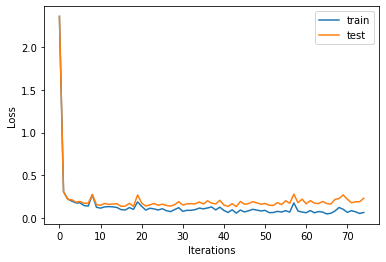

In [ ]:
plt.plot(train_losses, label = 'train')
plt.plot(test_losses, label = 'test')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

In [ ]:
y_train_label = traindata.targets.numpy()
y_test_label = testdata.targets.numpy()
y_train_pred = []
y_test_pred = []
train_loader = torch.utils.data.DataLoader(traindata, batch_size=64, shuffle= False)
test_loader = torch.utils.data.DataLoader(testdata, batch_size=64, shuffle = False)

with torch.no_grad():
  
  for x_train, y_train in train_loader:
    x_train = x_train.view(x_train.shape[0],784)
    output = model1(x_train)
    y_train_pred.extend(torch.argmax(output, axis = 1).tolist())

  for x_test, y_test in test_loader:
    x_test = x_test.view(x_test.shape[0],784)
    output = model1(x_test)
    y_test_pred.extend(torch.argmax(output, axis = 1).tolist())

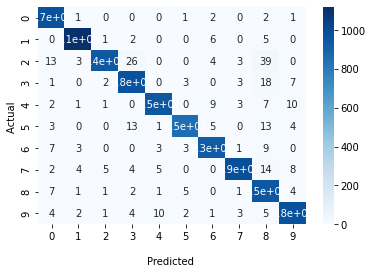

In [ ]:

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test_label, y_test_pred)

import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted ')
ax.set_ylabel('Actual ');

## Ticket labels 
ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax.yaxis.set_ticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_test_label, y_test_pred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.91      0.95      1032
           3       0.95      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.97      0.97       958
           7       0.99      0.96      0.97      1028
           8       0.89      0.98      0.93       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
from sklearn.metrics import accuracy_score
Train_Accuracy = accuracy_score(y_train_label, y_train_pred, normalize=True, sample_weight=None)
Test_Accuracy = accuracy_score(y_test_label, y_test_pred, normalize=True, sample_weight=None)
print(f"Train Accuracy: {Train_Accuracy}")
print(f"Test Accuracy: {Test_Accuracy}")

Train Accuracy: 0.98245
Test Accuracy: 0.9663


# Regularization

In [ ]:
train_loader = torch.utils.data.DataLoader(traindata, batch_size=64, shuffle= True)
test_loader = torch.utils.data.DataLoader(testdata, batch_size=64, shuffle = True)

In [ ]:
optimizer = torch.optim.Adam(model1.parameters(), lr=0.01, weight_decay=1e-5)

In [ ]:
from tqdm.notebook import tqdm_notebook
epochs = 15
train_losses = []
test_losses = []
train_epoch_loss = []
for e in range(epochs):
  running_loss = 0
  for i,(images, label) in tqdm_notebook(enumerate(train_loader)):
    images = images.view(images.shape[0],784)
    #images, label = data[0],data[1]
    model1.train()

    # Training pass
    optimizer.zero_grad()
    output = model1(images)
    loss = loss_fn(output, label)

    #This is where the model learns by backpropagating
    loss.backward()

    #And optimizes its weights here 
    optimizer.step()
    running_loss += loss.item()
    if i % 200 == 0:
      with torch.no_grad():
        running_loss = 0 
        model1.eval()

        train_loss = 0
        for x_train, y_train in train_loader:
          x_train = x_train.view(x_train.shape[0],784)
          output = model1(x_train)
          loss = loss_fn(output, y_train)
          train_loss += loss.item()
        train_losses.append(train_loss/len(train_loader))

        test_loss = 0
        for x_test, y_test in test_loader:
          x_test = x_test.view(x_test.shape[0],784)
          output = model1(x_test)
          loss = loss_fn(output, y_test)
          test_loss += loss.item()
        test_losses.append(test_loss/len(test_loader))

  train_epoch_loss.append(running_loss/len(train_loader))

  print('Epoch {} - Training loss: {}'.format(e+1, running_loss/len(train_loader)))



0it [00:00, ?it/s]

Epoch 1 - Training loss: 0.015520394453145901


0it [00:00, ?it/s]

Epoch 2 - Training loss: 0.01322748948798092


0it [00:00, ?it/s]

Epoch 3 - Training loss: 0.01716583664715191


0it [00:00, ?it/s]

Epoch 4 - Training loss: 0.012035200660522065


0it [00:00, ?it/s]

Epoch 5 - Training loss: 0.013536159932523517


0it [00:00, ?it/s]

Epoch 6 - Training loss: 0.013184440005491219


0it [00:00, ?it/s]

Epoch 7 - Training loss: 0.012461083354120618


0it [00:00, ?it/s]

Epoch 8 - Training loss: 0.017007013459924235


0it [00:00, ?it/s]

Epoch 9 - Training loss: 0.01300412177794309


0it [00:00, ?it/s]

Epoch 10 - Training loss: 0.013208284670772997


0it [00:00, ?it/s]

Epoch 11 - Training loss: 0.01298156696817786


0it [00:00, ?it/s]

Epoch 12 - Training loss: 0.015480083893728392


0it [00:00, ?it/s]

Epoch 13 - Training loss: 0.012771666429610229


0it [00:00, ?it/s]

Epoch 14 - Training loss: 0.013043493439428145


0it [00:00, ?it/s]

Epoch 15 - Training loss: 0.014676185255658739


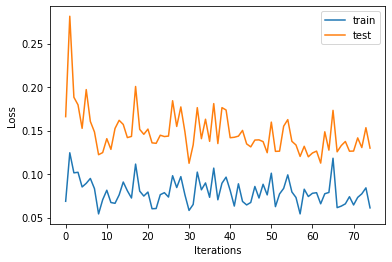

In [ ]:
plt.plot(train_losses, label = 'train')
plt.plot(test_losses, label = 'test')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

In [ ]:
y_train_label = traindata.targets.numpy()
y_test_label = testdata.targets.numpy()
y_train_pred = []
y_test_pred = []
train_loader = torch.utils.data.DataLoader(traindata, batch_size=64, shuffle= False)
test_loader = torch.utils.data.DataLoader(testdata, batch_size=64, shuffle = False)

with torch.no_grad():
  
  for x_train, y_train in train_loader:
    x_train = x_train.view(x_train.shape[0],784)
    output = model1(x_train)
    y_train_pred.extend(torch.argmax(output, axis = 1).tolist())

  for x_test, y_test in test_loader:
    x_test = x_test.view(x_test.shape[0],784)
    output = model1(x_test)
    y_test_pred.extend(torch.argmax(output, axis = 1).tolist())

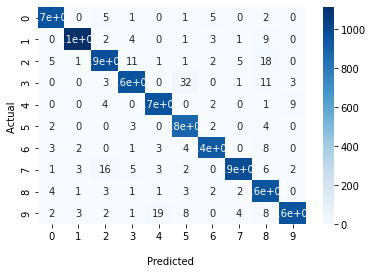

In [ ]:
cf_matrix = confusion_matrix(y_test_label, y_test_pred)

import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted ')
ax.set_ylabel('Actual ');

## Ticket labels 
ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax.yaxis.set_ticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_test_label, y_test_pred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.96      0.96      1032
           3       0.97      0.95      0.96      1010
           4       0.97      0.98      0.98       982
           5       0.94      0.99      0.97       892
           6       0.98      0.98      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.93      0.98      0.96       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
from sklearn.metrics import accuracy_score

print(f"Train Accuracy: {accuracy_score(y_train_label, y_train_pred, normalize=True, sample_weight=None)}")
print(f"Test Accuracy: {accuracy_score(y_test_label, y_test_pred, normalize=True, sample_weight=None)}")

Train Accuracy: 0.9821333333333333
Test Accuracy: 0.9722


# Conclusion


Without Regularisation the training loss and test loss seems to be diverging at the end while in the second case when we used the Regularization it can be seen that the traing loss and test loss do not diverge even at the end. So it is helping in reducing overfitting.